In [1]:
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from photutils import SkyCircularAperture
from photutils import DAOStarFinder
from photutils import datasets
from photutils import CircularAperture
from photutils import aperture_photometry

from astropy.stats import sigma_clipped_stats
from astropy.stats import mad_std
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize


import astropy.io.fits as fits
import matplotlib.pyplot as plt
import ccdproc
import glob


In [6]:
image = datasets.load_star_image('.Data/Photometry/quadRU.fits')
pic = image.data[300:800, 300:800].astype(float)
pic -= np.median(pic)
dataset = image.data 

In [7]:
mean, median, std = sigma_clipped_stats(dataset, sigma=3.0)
mean, median, std

(3770.4896097401975, 3744.0, 237.21215226532127)

Number of pixels: 1121481
Mean: 3770.4896097401975
Standard Deviation: 237.21215226532127


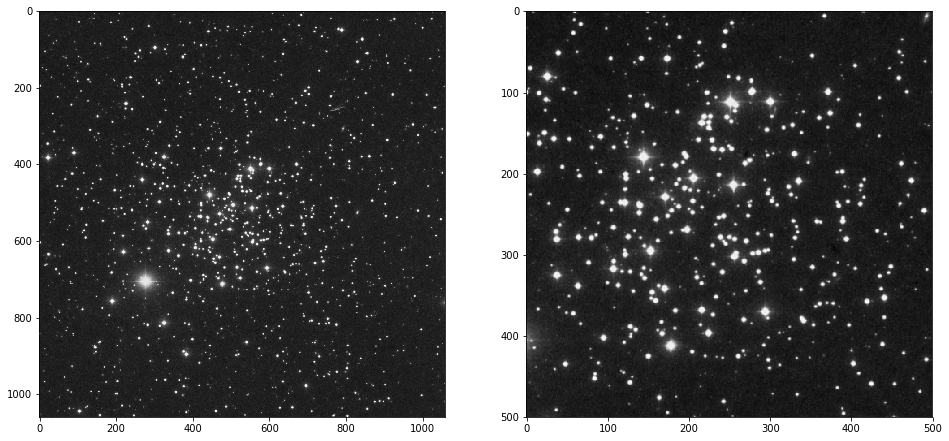

In [8]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,12)

ax[0].imshow(dataset,cmap=plt.cm.gray)

ax[1].imshow(dataset[300:800, 300:800], cmap=plt.cm.gray)

print("Number of pixels: {}".format(dataset.size))
print("Mean: {}".format(mean))
print("Standard Deviation: {}". format(std))

In [9]:
bkg_sigma = mad_std(pic)
dao = DAOStarFinder(fwhm=3.0, threshold=20*std)
sources = dao(pic)
for col in sources.colnames:
    sources[col].info.format = '%.8g'
sources


id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64
1,8.3505539,0.38618101,0.70918808,0.22330145,-0.46482253,25,0,7816,1.3372429,-0.31552577
2,59.521219,0.48759649,0.38180899,-0.082209245,-0.52302099,25,0,7583,1.505168,-0.44396247
3,149.482,0.38484628,0.367567,-0.80158864,-0.56846302,25,0,6874,1.3860651,-0.35445907
4,492.7143,5.9843232,0.38447115,-0.45357566,0.24406243,25,0,8897,1.022676,-0.024345165
5,169.53451,6.5963502,0.57084726,0.1899665,-0.018819612,25,0,5978,1.0755442,-0.079070646
6,58.898582,10.297678,0.40446834,-0.22380622,-0.025073804,25,0,8219,1.539668,-0.46856772
7,253.05651,13.968274,0.38512099,-0.12229698,-0.20055544,25,0,9106,1.0837371,-0.087309878
8,172.84668,15.876698,0.40681942,-0.10090975,-0.11879361,25,0,8610,1.6130221,-0.51910082
9,98.450896,20.86185,0.46894811,-0.27871989,-0.18773091,25,0,7918,1.4944313,-0.43618991


In [68]:
position = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(position, r=3.0)
phot_table = aperture_photometry(pic, apertures, method='subpixel', subpixels=5)
for col in phot_table.colnames:
        phot_table[col].info.format = '%.8g'
print(phot_table)

 id  xcenter   ycenter   aperture_sum
       pix       pix                 
--- --------- ---------- ------------
  1 8.3505539 0.38618101     36505.12
  2 59.521219 0.48759649     67632.84
  3   149.482 0.38484628      64658.4
  4  492.7143  5.9843232    139044.16
  5 169.53451  6.5963502     38115.72
  6 58.898582  10.297678     73420.52
  7 253.05651  13.968274    153905.32
  8 172.84668  15.876698        77293
  9 98.450896   20.86185      61387.4
 10 148.95252  20.892813     35175.04
...       ...        ...          ...
194  382.9887  463.24541     101673.8
195 484.78849  468.01825     91499.72
196 303.37203  470.81672     42193.32
197 333.40963  471.60912    104676.56
198 184.44948  474.16094     41458.72
199 441.86921  481.53185     48956.96
200 389.05313  488.97841     58352.96
201 36.756929   490.5894    106089.52
202 173.82676  493.93203    108169.96
203 390.60622  494.94413    132468.32
Length = 203 rows


In [69]:
phot_table2 = aperture_photometry(pic, apertures, method='exact', subpixels=5)
for col in phot_table2.colnames:
        phot_table2[col].info.format = '%.8g'
print(phot_table2)

 id  xcenter   ycenter   aperture_sum
       pix       pix                 
--- --------- ---------- ------------
  1 8.3505539 0.38618101    36522.754
  2 59.521219 0.48759649     67635.04
  3   149.482 0.38484628    64567.009
  4  492.7143  5.9843232    139092.91
  5 169.53451  6.5963502    38092.878
  6 58.898582  10.297678     73310.87
  7 253.05651  13.968274    153719.29
  8 172.84668  15.876698    77227.064
  9 98.450896   20.86185    61341.712
 10 148.95252  20.892813    35185.714
...       ...        ...          ...
194  382.9887  463.24541    101655.85
195 484.78849  468.01825    91463.485
196 303.37203  470.81672    42243.142
197 333.40963  471.60912       104674
198 184.44948  474.16094    41429.516
199 441.86921  481.53185    48921.513
200 389.05313  488.97841    58380.181
201 36.756929   490.5894    106005.17
202 173.82676  493.93203    108095.86
203 390.60622  494.94413    132602.57
Length = 203 rows


In [70]:
phot_table3 = aperture_photometry(pic, apertures, method='center', subpixels=5)
for col in phot_table3.colnames:
        phot_table3[col].info.format = '%.8g'
print(phot_table3)

 id  xcenter   ycenter   aperture_sum
       pix       pix                 
--- --------- ---------- ------------
  1 8.3505539 0.38618101        36801
  2 59.521219 0.48759649        68255
  3   149.482 0.38484628        65250
  4  492.7143  5.9843232       135908
  5 169.53451  6.5963502        38681
  6 58.898582  10.297678        73724
  7 253.05651  13.968274       153690
  8 172.84668  15.876698        77597
  9 98.450896   20.86185        61539
 10 148.95252  20.892813        35054
...       ...        ...          ...
194  382.9887  463.24541       102379
195 484.78849  468.01825        92168
196 303.37203  470.81672        42593
197 333.40963  471.60912       106711
198 184.44948  474.16094        41445
199 441.86921  481.53185        49296
200 389.05313  488.97841        57358
201 36.756929   490.5894       107528
202 173.82676  493.93203       108080
203 390.60622  494.94413       132631
Length = 203 rows


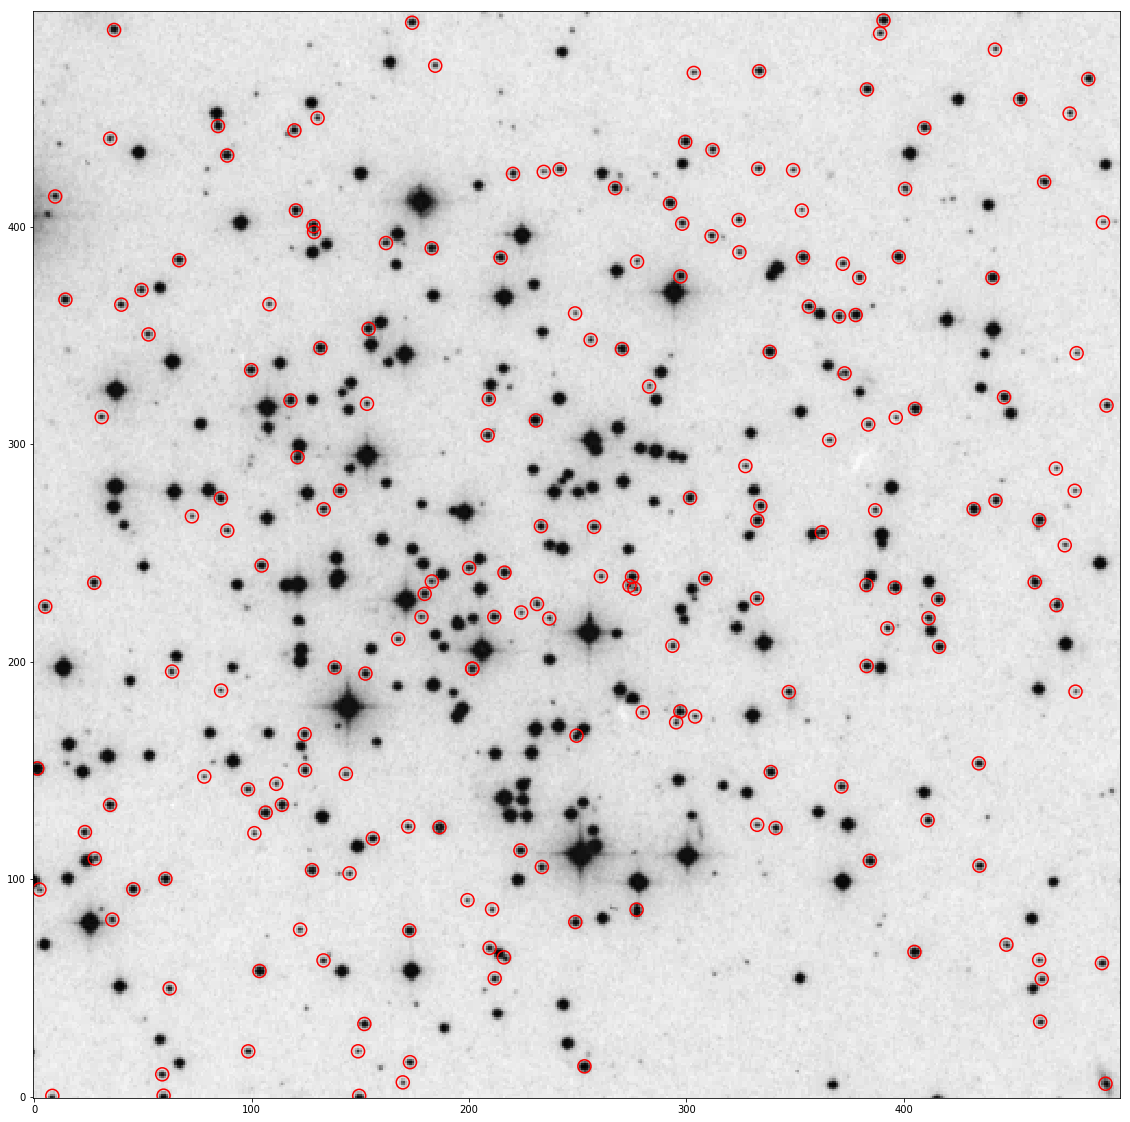

In [76]:
plt.figure(figsize=(20,20))
plt.imshow(pic, cmap='gray_r', origin='lower') 
apertures.plot(color='red', lw=1.5, alpha=1.0)

In [85]:
from photutils import CircularAnnulus
apertures = CircularAperture(position, r=3.0)
annulus_apertures = CircularAnnulus(position, r_in=2., r_out=4.)

In [86]:
apers = [apertures, annulus_apertures]
phot_table4 = aperture_photometry(pic, apers)
for col in phot_table4.colnames:
    phot_table4[col].info.format = '%.8g'  # for consistent table output
print(phot_table4)

 id  xcenter   ycenter   aperture_sum_0 aperture_sum_1
       pix       pix                                  
--- --------- ---------- -------------- --------------
  1 8.3505539 0.38618101      36522.754      1516.5693
  2 59.521219 0.48759649       67635.04      11866.812
  3   149.482 0.38484628      64567.009      11647.843
  4  492.7143  5.9843232      139092.91      96532.406
  5 169.53451  6.5963502      38092.878      5339.3301
  6 58.898582  10.297678       73310.87      15580.484
  7 253.05651  13.968274      153719.29      77600.244
  8 172.84668  15.876698      77227.064      19006.217
  9 98.450896   20.86185      61341.712      9588.4557
 10 148.95252  20.892813      35185.714      3745.8151
...       ...        ...            ...            ...
194  382.9887  463.24541      101655.85      33975.673
195 484.78849  468.01825      91463.485      27435.226
196 303.37203  470.81672      42243.142      6821.2716
197 333.40963  471.60912         104674      34595.629
198 184.44

In [87]:
ap_0 = phot_table4['aperture_sum_0']
ap_1 = phot_table4['aperture_sum_1']
flux_diff = ap_0 - ap_1
phot_table4['flux difference'] = flux_diff
phot_table4['flux difference'].info.format = '%.8g'
print(phot_table4['flux difference'])

flux difference
---------------
      35006.185
      55768.228
      52919.166
      42560.501
      32753.548
      57730.386
      76119.043
      58220.847
      51753.256
      31439.899
            ...
      78538.884
      67680.172
      64028.259
       35421.87
       70078.37
       35000.51
      39520.003
      36172.028
       63923.51
      69151.983
      73543.817
Length = 203 rows


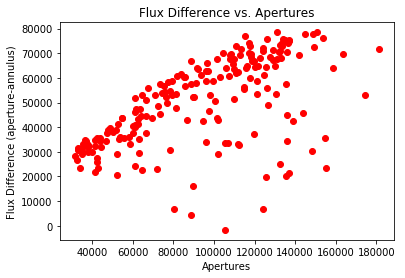

In [92]:
y = flux_diff
x = ap_0
plt.scatter(x, y, color='r', marker='o');
plt.xlabel("Apertures")
plt.ylabel("Flux Difference (aperture-annulus)")
plt.title('Flux Difference vs. Apertures');


In [118]:
#PSF Fitting portion

from photutils.psf import IterativelySubtractedPSFPhotometry
from photutils.psf import BasicPSFPhotometry
from photutils.psf import DAOPhotPSFPhotometry
from photutils.detection import IRAFStarFinder
from photutils.psf import IntegratedGaussianPRF, DAOGroup
from photutils.background import MMMBackground, MADStdBackgroundRMS
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.stats import gaussian_sigma_to_fwhm
from astropy.table import Table

In [125]:
import numpy as np
from astropy.table import Table
from photutils.datasets import (make_random_gaussians_table,
                                make_noise_image,
                                make_gaussian_sources_image)
psf_sources = Table()
psf_sources['id'] = phot_table4['id']
psf_sources['x_0'] = phot_table4['xcenter']
psf_sources['y_0'] = phot_table4['ycenter']
psf_sources

sigma_psf = 2.0
daogroup = DAOGroup(2.0*sigma_psf*gaussian_sigma_to_fwhm)
mmm_bkg = MMMBackground()
fitter = LevMarLSQFitter()
psf_model = IntegratedGaussianPRF(sigma=sigma_psf)

photometry = BasicPSFPhotometry(group_maker=daogroup,
                                                 bkg_estimator=mmm_bkg,
                                                psf_model=psf_model,
                                                 fitter=LevMarLSQFitter(),
                                                 fitshape=(11,11))

result_tab = photometry(image = pic, init_guesses = psf_sources)
residual_image = photometry.get_residual_image()
result_tab

id,x_0,y_0,flux_0,group_id,x_fit,y_fit,flux_fit,flux_unc,x_0_unc,y_0_unc
,pix,pix,,,,,,,,
int32,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64
1,8.350553913860832,0.3861810069353123,37701.01310781043,1,8.325262584937208,-2.2852549553595005,272498.04299206974,81619.57207517038,0.17329286472702063,0.469175586945222
2,59.52121926776459,0.4875964899564059,74637.34153218195,2,59.570843704930525,-1.124400315389294,243990.46024970844,26272.413505463857,0.12438749700711328,0.25016873101966985
3,149.4820026650521,0.3848462830168412,69550.50566049239,3,149.48884919892436,-1.5328148217794237,284718.40118456783,34308.26538192007,0.10872313657067671,0.24251653642166857
4,492.71429553397076,5.984323205317977,215395.35990002658,4,492.75245154465733,6.031793530753845,225091.67521281933,6704.474934292533,0.08520077746118512,0.08518250459286177
5,169.53450790914493,6.596350235791051,47128.36605641683,5,169.58716350592397,6.573846619764563,69558.65051539576,4899.120606410421,0.20151497234461677,0.20152302116777485
6,58.89858178463897,10.297677560700237,85439.14173686021,6,58.94145791648634,10.280191819645346,123360.13015560308,6790.490209960489,0.15743328813376936,0.1574614118756712
7,253.05650665344993,13.968274398639746,190207.4304459797,7,253.0226222076228,13.97286952310916,233383.95943291817,5290.741857891959,0.06483663148006283,0.06483459912621467
8,172.84667699581664,15.876697507062202,92963.89023555265,8,172.84818531459382,15.879735880158947,129662.06775601547,6535.93199487161,0.14417315875763506,0.14416942570338484


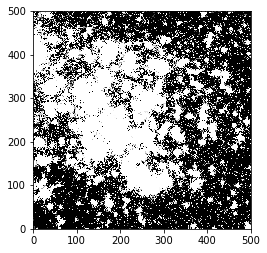

In [124]:
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(pic, cmap=plt.cm.gray, origin='lower', norm=norm, vmin=0, vmax=100);

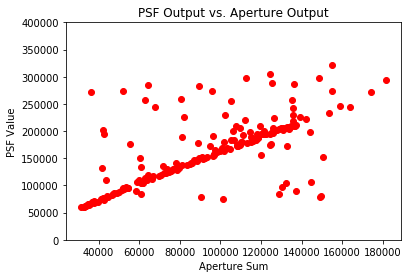

In [131]:
y1 = result_tab['flux_fit']
x1 = phot_table4['aperture_sum_0']
plt.scatter(x1, y1, color='r', marker='o')
plt.ylim(0,400000)
plt.xlabel("Aperture Sum")
plt.ylabel("PSF Value")
plt.title('PSF Output vs. Aperture Output');
